In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor 
import wrangle, split_scale

In [2]:
df = wrangle.wrangle_telco()
X=df[['monthly_charges','tenure']]
y=df[['total_charges']]
train_pct = .8
xtrain, xtest, ytrain, ytest = (
    split_scale.split_my_data(X,y,train_pct))
xtrain.head()

,monthly_charges,tenure
700,66.25,52
1341,90.95,66
629,93.20,71
1034,80.60,70
1447,20.05,54


In [3]:
train = pd.concat([xtrain, ytrain], axis=1)
train.head()

test = pd.concat([xtest, ytest], axis=1)


In [4]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg',
            plot_kws = {'line_kws': {'color' : 'orange'}})


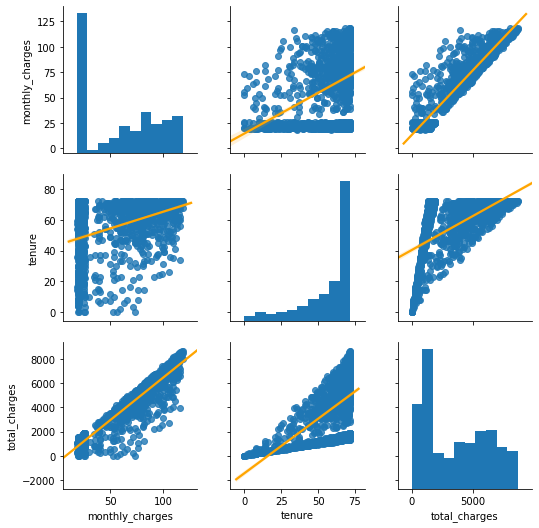

In [5]:
plot_variable_pairs(train)

In [6]:
def months_to_years(months_col, df):
    df['tenure_years'] = (months_col/12).astype(int)
    return df

In [7]:
new_df = months_to_years(train['tenure'], train)
new_df.head()

,monthly_charges,tenure,total_charges,tenure_years
700,66.25,52,3330.10,4
1341,90.95,66,5930.05,5
629,93.20,71,6506.15,5
1034,80.60,70,5460.20,5
1447,20.05,54,1102.40,4


In [8]:
def plot_categorical_and_continous_vars(
            categorical_var, continuous_var, df):
    x = categorical_var
    y = continuous_var
    data = df
    f, axes = plt.subplots(1,3, sharey=True, figsize=(16,9))
    plt.rc('font', size=12)

    sns.swarmplot(x=x, y=y, data=data, ax=axes[0])
    sns.boxplot(x=x, y=y, data=data, ax=axes[1])
    sns.barplot(x=x, y=y, data=data, ax=axes[2])

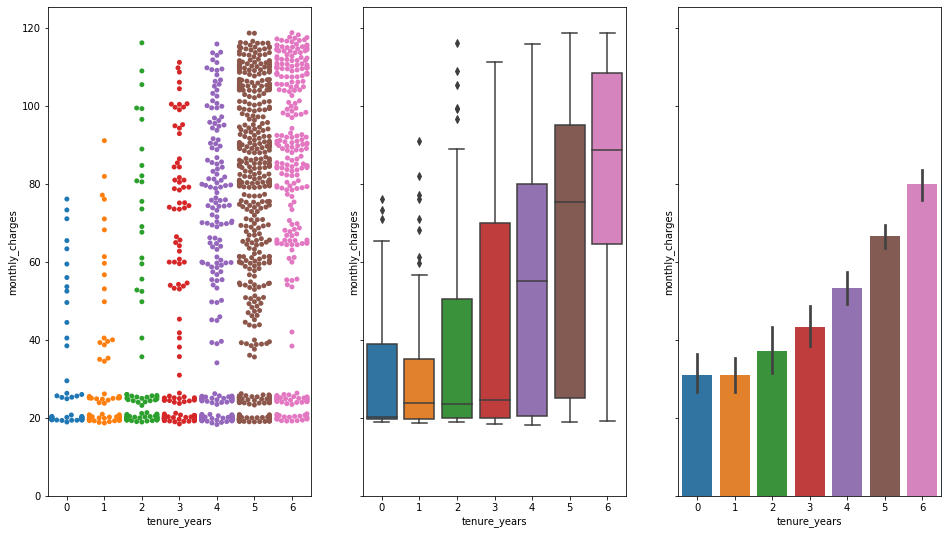

In [9]:
plot_categorical_and_continous_vars('tenure_years','monthly_charges',new_df)

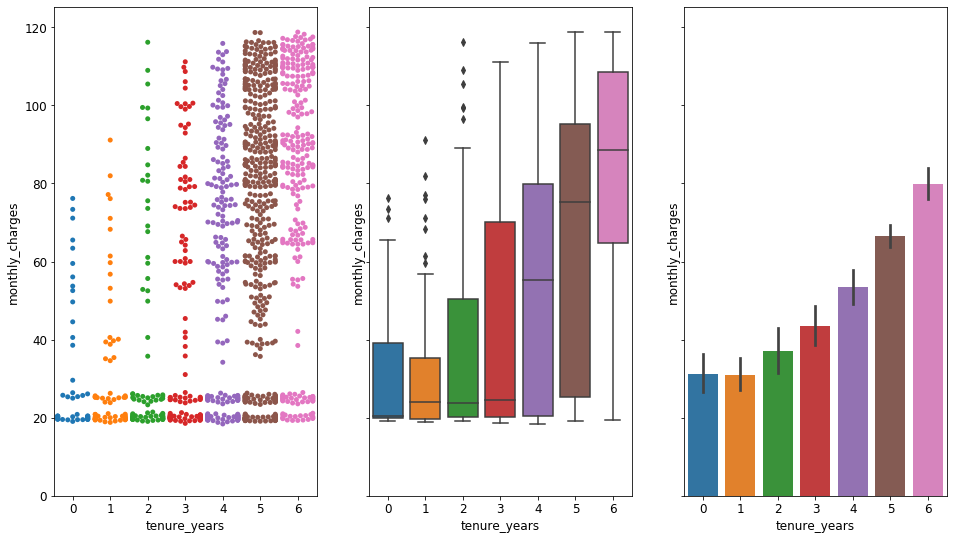

In [10]:
x = 'tenure_years'
y = 'monthly_charges'
data = new_df

f, axes = plt.subplots(1,3, sharey=True, figsize=(16,9))
plt.rc('font', size=12)

sns.swarmplot(x=x, y=y, data=data, ax=axes[0])
sns.boxplot(x=x, y=y, data=data, ax=axes[1])
sns.barplot(x=x, y=y, data=data, ax=axes[2])
